In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
from datetime import datetime
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model

# Fase 1 - Comprensi√≥n del negocio

En esta fase se identificar√°n los factores clave necesarios para abordar los objetivos empresariales y se plantear√°n en objetivos espec√≠ficos de miner√≠a de datos, asegurando que el an√°lisis posterior responda adecuadamente a las necesidades del negocio.

## Proyecto de Deep Learning - Dataset CIFAR-100

**Autores:** Daniel Iturra, Diego Velasquez, Jonathan Huala, Jorge Gonzales.

**Fecha:** 20-04-2025

# Fase 2 - Comprensi√≥n de los datos

Durante esta fase, se realizar√° una recolecci√≥n y an√°lisis preliminar de los datos disponibles, con el objetivo de comprender su naturaleza y calidad. Se identificar√°n patrones iniciales y posibles problemas que puedan afectar el an√°lisis, lo que permitir√° guiar el proceso de preparaci√≥n de los datos.

## Exploraciones iniciales

Configuraci√≥n de estilos para que las gr√°ficas se van m√°s limpias.

In [34]:
plt.style.use('ggplot')
sns.set()

Se cargan los datos de CIFAR-100 usando la funci√≥n load_data() con label_mode='fine', lo cual significa que se usaron las 100 clases espec√≠ficas del dataset.

In [2]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Se revisan las dimensiones de los datos y las etiquetas.

In [36]:
print("Dimensiones del set de entrenamiento:", x_train.shape)
print("Dimensiones del set de prueba:", x_test.shape)

num_classes = len(np.unique(y_train))
print("N√∫mero de clases:", num_classes)

print("Primeras 10 etiquetas (y_train):", y_train[:10].ravel())
print("Etiquetas √∫nicas:", np.unique(y_train))

Dimensiones del set de entrenamiento: (50000, 32, 32, 3)
Dimensiones del set de prueba: (10000, 32, 32, 3)
N√∫mero de clases: 100
Primeras 10 etiquetas (y_train): [19 29  0 11  1 86 90 28 23 31]
Etiquetas √∫nicas: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


Se define la lista de nombres humanos de las etiquetas, asociadas a cada n√∫mero (del 0 al 99).

In [37]:
fine_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

Se seleccionan 10 im√°genes aleatorias y se muestran junto a su nombre.

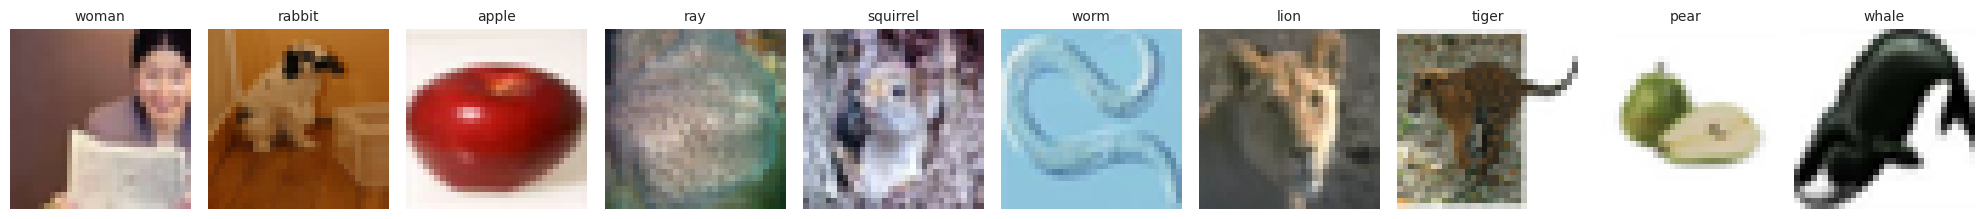

In [38]:
fig, axes = plt.subplots(1, 10, figsize=(20, 3))
for i in range(10):
    index = random.randint(0, len(x_train) - 1)
    axes[i].imshow(x_train[index])
    label = y_train[index][0]
    axes[i].set_title(fine_labels[label], fontsize=10)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Se cuentan cu√°ntas im√°genes hay por clase y se construy√≥ un dataframe con esa informaci√≥n.

In [39]:
unique, counts = np.unique(y_train, return_counts=True)

df_counts = pd.DataFrame({
    'Label ID': unique,
    'Label Name': [fine_labels[i] for i in unique],
    'Count': counts
})

df_counts_sorted = df_counts.sort_values(by='Count', ascending=False)
df_counts_sorted.head()

Label ID Label Name  Count
0          0      apple    500
63        63  porcupine    500
73        73      shark    500
72        72       seal    500
71        71        sea    500

Se grafica un barplot de las clases m√°s comunes.

/tmp/ipykernel_23/237555424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts_sorted.head(30), x='Label Name', y='Count', palette='viridis')


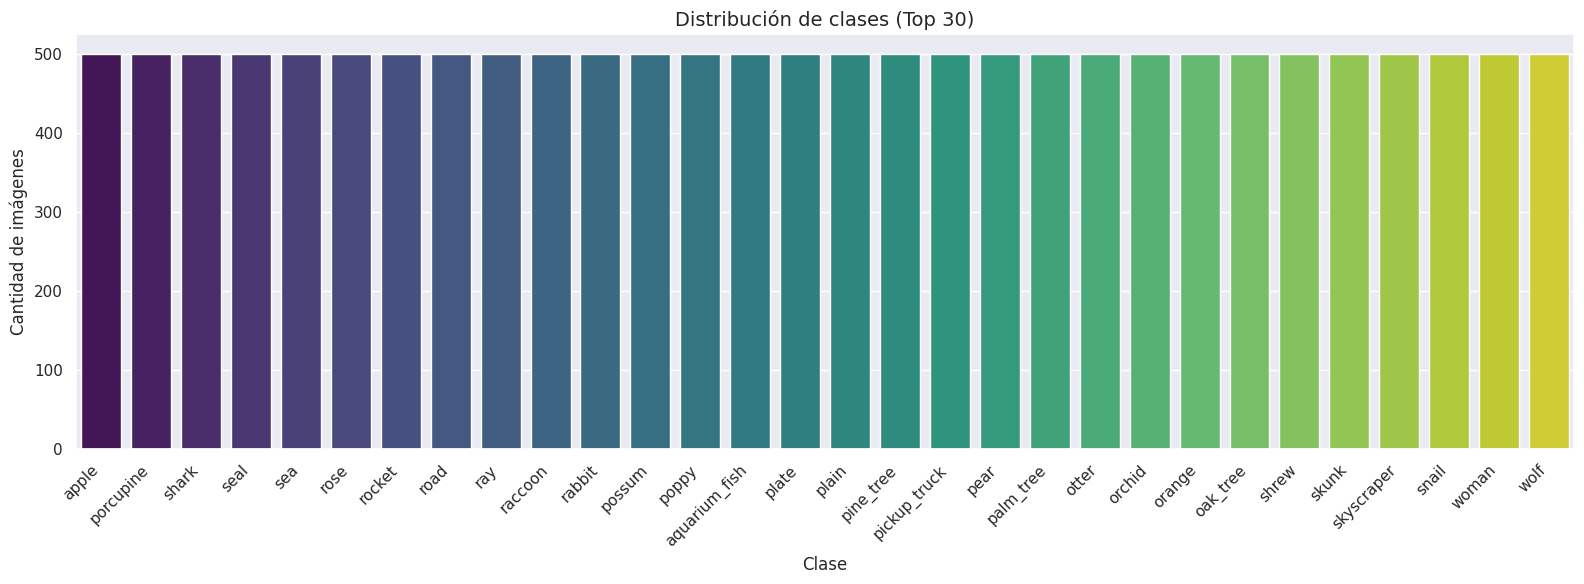

In [40]:
plt.figure(figsize=(16, 6))
sns.barplot(data=df_counts_sorted.head(30), x='Label Name', y='Count', palette='viridis')
plt.title('Distribuci√≥n de clases (Top 30)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cantidad de im√°genes')
plt.xlabel('Clase')
plt.tight_layout()
plt.show()

Se pasar√° a la preparaci√≥n de los datos para ocuparlos en las redes neuronales para las clases [Preparaci√≥n para la red de las clases] [Fase 3] 

# Fase 3 - Preparaci√≥n de los datos

En esta fase se seleccionar√°n, limpiar√°n y transformar√°n los datos para que sean adecuados al modelado. Se abordar√°n problemas como valores faltantes, duplicados o inconsistencias, y se construir√°n nuevas variables cuando sea necesario, con el objetivo de obtener un conjunto de datos listo para aplicar las t√©cnicas de modelado.

## Preparaci√≥n para modelo MLP

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

y_train_cat = to_categorical(y_train, 100)
y_test_cat  = to_categorical(y_test, 100)

## Preparaci√≥n para modelo CNN

Las im√°genes son normalizadas (sus valores pasan de 0-255 a 0-1) para que la red neuronal pueda aprender de forma m√°s eficiente.

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Las etiquetas se convierten a one-hot encoding para que la red pueda trabajar con ellas correctamente en la salida softmax.

In [4]:
y_train_cat = to_categorical(y_train, 100)
y_test_cat = to_categorical(y_test, 100)

## Implementamos la t√©cnica de Cutout para modelo CNN
Elimina aleatoriamente secciones rectangulares de las im√°genes durante el entrenamiento.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def simple_cutout(image, size=8):
    """Versi√≥n simplificada de cutout para menor carga computacional"""
    h, w = image.shape[0], image.shape[1]
    
    # Centro aleatorio
    cx = np.random.randint(0, w)
    cy = np.random.randint(0, h)
    
    # Coordenadas del recorte
    x1 = max(0, cx - size//2)
    x2 = min(w, cx + size//2)
    y1 = max(0, cy - size//2)
    y2 = min(h, cy + size//2)
    
    # Aplicar m√°scara
    img_copy = image.copy()
    img_copy[y1:y2, x1:x2, :] = 0.0
    
    return img_copy

# Configurar el generador con menor transformaci√≥n
datagen = ImageDataGenerator(
    preprocessing_function=simple_cutout,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# Usar batch size mayor para acelerar el entrenamiento
batch_size = 128

# Generar los generadores
train_generator = datagen.flow(
    x_train, y_train_cat,
    batch_size=batch_size,
    subset='training'
)

val_generator = datagen.flow(
    x_train, y_train_cat,
    batch_size=batch_size,
    subset='validation'
)

Se pasa al modelado [Modelado de las redes neuronales para las clases] [Fase 4]

# Fase 4 - Modelado

En esta fase se seleccionar√°n los algoritmos de modelado m√°s adecuados y se entrenar√°n los modelos utilizando el conjunto de datos preparado. Se ajustar√°n los par√°metros de los modelos y se evaluar√°n los resultados preliminares para determinar qu√© t√©cnicas ofrecen el mejor desempe√±o para cumplir con los objetivos planteados.

## Modelado para modelo MLP

In [ ]:
# === PAR√ÅMETROS DE ENTRENAMIENTO ===
batch_size = 128
epochs = 150
validation_split = 0.2

# === PAR√ÅMETROS DEL MODELO MLP ===
input_shape   = (32, 32, 3)
hidden_layers = 4
hidden_units  = [2048, 1024, 512, 256]
activation    = 'relu'
dropout_rate  = 0.3
output_activation = 'softmax'

# === DEFINICI√ìN DEL MODELO (sin funci√≥n) ===
inputs = Input(shape=input_shape, name="input_layer")
x = Flatten(name="flatten_input")(inputs)
x = BatchNormalization(name="batchnorm_input")(x)

for i in range(hidden_layers):
    x = Dense(hidden_units[i], activation=activation, name=f"dense_{i+1}")(x)
    x = BatchNormalization(name=f"batchnorm_{i+1}")(x)
    if dropout_rate > 0:
        x = Dropout(dropout_rate, name=f"dropout_{i+1}")(x)

outputs = Dense(100, activation=output_activation, name="output")(x)
model = Model(inputs=inputs, outputs=outputs, name=f"MLP_{hidden_layers}layers")

# === COMPILAR MODELO ===
optimizer = Adam(learning_rate=0.0008, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# === CALLBACKS ===
checkpoint_path = 'checkpoints/final_mlp_model.keras'
early_stopping  = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb  = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)
callbacks = [early_stopping, model_checkpoint, tensorboard_cb]

# === ENTRENAMIENTO ===
start_time = time.time()

history = model.fit(
    x_train, y_train_cat,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=validation_split,
    callbacks=callbacks,
    verbose=1
)

print(f"
‚è±Ô∏è Tiempo total de entrenamiento: {(time.time()-start_time)/60:.2f} min")

## Modelado para modelo CNN

Construimos el modelo con mayor capacidad, usando bloques Inception mejorados y aumentando el n√∫mero de filtros.

In [12]:
from tensorflow.keras import layers, models, regularizers
import tensorflow as tf

def efficient_block(x, filters, kernel_size=3, regularization=1e-4):
    """Bloque convolucional eficiente con BatchNorm"""
    # Primera capa convolucional
    x = layers.Conv2D(filters, kernel_size, padding='same', 
                      kernel_regularizer=regularizers.l2(regularization))(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    
    # Segunda capa convolucional
    x = layers.Conv2D(filters, kernel_size, padding='same',
                      kernel_regularizer=regularizers.l2(regularization))(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    
    return x

# Construir modelo optimizado
def build_efficient_model(input_shape=(32, 32, 3), num_classes=100):
    inputs = layers.Input(shape=input_shape)
    
    # Bloque 1
    x = efficient_block(inputs, 64)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.2)(x)
    
    # Bloque 2
    x = efficient_block(x, 128)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.3)(x)
    
    # Bloque 3
    x = efficient_block(x, 256)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Dropout(0.4)(x)
    
    # Clasificaci√≥n
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, kernel_regularizer=regularizers.l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Crear el modelo
model = build_efficient_model()

# Mostrar resumen del modelo
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                            

Configuramos un optimizador Adam con una tasa de aprendizaje optimizada y compilamos el modelo con Label Smoothing.

In [13]:
checkpoint = ModelCheckpoint(
    'checkpoints/cnn_cifar100_efficient_best.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Usamos Adam para convergencia r√°pida
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compilar con label smoothing
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

Se configura el earlyStopping, el cual detiene el entrenamiento cuando la validaci√≥n no mejora en 5 √©pocas seguidas, luego se configura ReduceLROnPlateau, el cual reduce la tasa de aprendizaje si la validaci√≥n se estanca.

In [14]:
# Early stopping m√°s agresivo
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Reducci√≥n de tasa de aprendizaje
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

Se entrena el modelo con aumento de datos en cada lote, se le coloca validaci√≥n autom√°tica, se implementa el guardado del mejor checkpoint, se le coloca la detenci√≥n temprana si no mejora el modelo y se ajusta autom√°ticamente el learning rate.

In [17]:
# Entrenamos con menos √©pocas pero suficientes para ver mejoras
history = model.fit(
    train_generator,
    epochs=50,  # Menos √©pocas
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint, reduce_lr],
    verbose=1
)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 4.4511 - accuracy: 0.0667
Epoch 1: val_accuracy improved from -inf to 0.03890, saving model to checkpoints/cnn_cifar100_efficient_best.h5


/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 278s 881ms/step - loss: 4.4511 - accuracy: 0.0667 - val_loss: 4.9652 - val_accuracy: 0.0389 - lr: 0.0010
Epoch 2/50
313/313 [==============================] - ETA: 0s - loss: 3.9775 - accuracy: 0.1309
Epoch 2: val_accuracy improved from 0.03890 to 0.12000, saving model to checkpoints/cnn_cifar100_efficient_best.h5
313/313 [==============================] - 260s 829ms/step - loss: 3.9775 - accuracy: 0.1309 - val_loss: 4.0400 - val_accuracy: 0.1200 - lr: 0.0010
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 3.6700 - accuracy: 0.1953
Epoch 3: val_accuracy improved from 0.12000 to 0.20860, saving model to checkpoints/cnn_cifar100_efficient_best.h5
313/313 [==============================] - 253s 809ms/step - loss: 3.6700 - accuracy: 0.1953 - val_loss: 3.6180 - val_accuracy: 0.2086 - lr: 0.0010
Epoch 4/50
313/313 [==============================] - ETA: 0s - loss: 3.4612 - accuracy: 0.2453
Epoch 4: val_accuracy improved from 0.

Se pasa a la evaluaci√≥n [Evaluaci√≥n de las redes neuronales para las clases] [Fase 5]

# Fase 5 - Evaluaci√≥n

En la fase de evaluaci√≥n se analizar√° el rendimiento de los modelos desarrollados, compar√°ndolos con los objetivos del negocio para asegurar que sean √∫tiles y precisos. Se tomar√° en cuenta la validez de los resultados, se decidir√° si es necesario ajustar los modelos o si est√°n listos para su implementaci√≥n.

## Evaluaci√≥n para modelo CNN

Se evalua la calidad final del modelo usando datos totalmente nuevos y no vistos durante el entrenamiento.

In [15]:
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
model = load_model('checkpoints/cnn_cifar100_efficient_best.h5')

# Ahora puedes evaluar el modelo
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"üîç Test accuracy: {test_accuracy:.4f}")
print(f"üìâ Test loss: {test_loss:.4f}")

2025-04-22 19:14:01.430133: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 15s 46ms/step - loss: 2.3862 - accuracy: 0.6104
üîç Test accuracy: 0.6104
üìâ Test loss: 2.3862


Se graficaron las curvas de precisi√≥n y p√©rdida para el entrenamiento y la validaci√≥n del modelo.

In [18]:
# 2. Obtener predicciones en conjunto de prueba
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# 3. Calcular exactitud global
accuracy = np.mean(y_pred == y_true)
print(f"Exactitud del modelo: {accuracy:.4f}")

2025-04-22 19:19:35.604818: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 13s 42ms/step
Exactitud del modelo: 0.6104


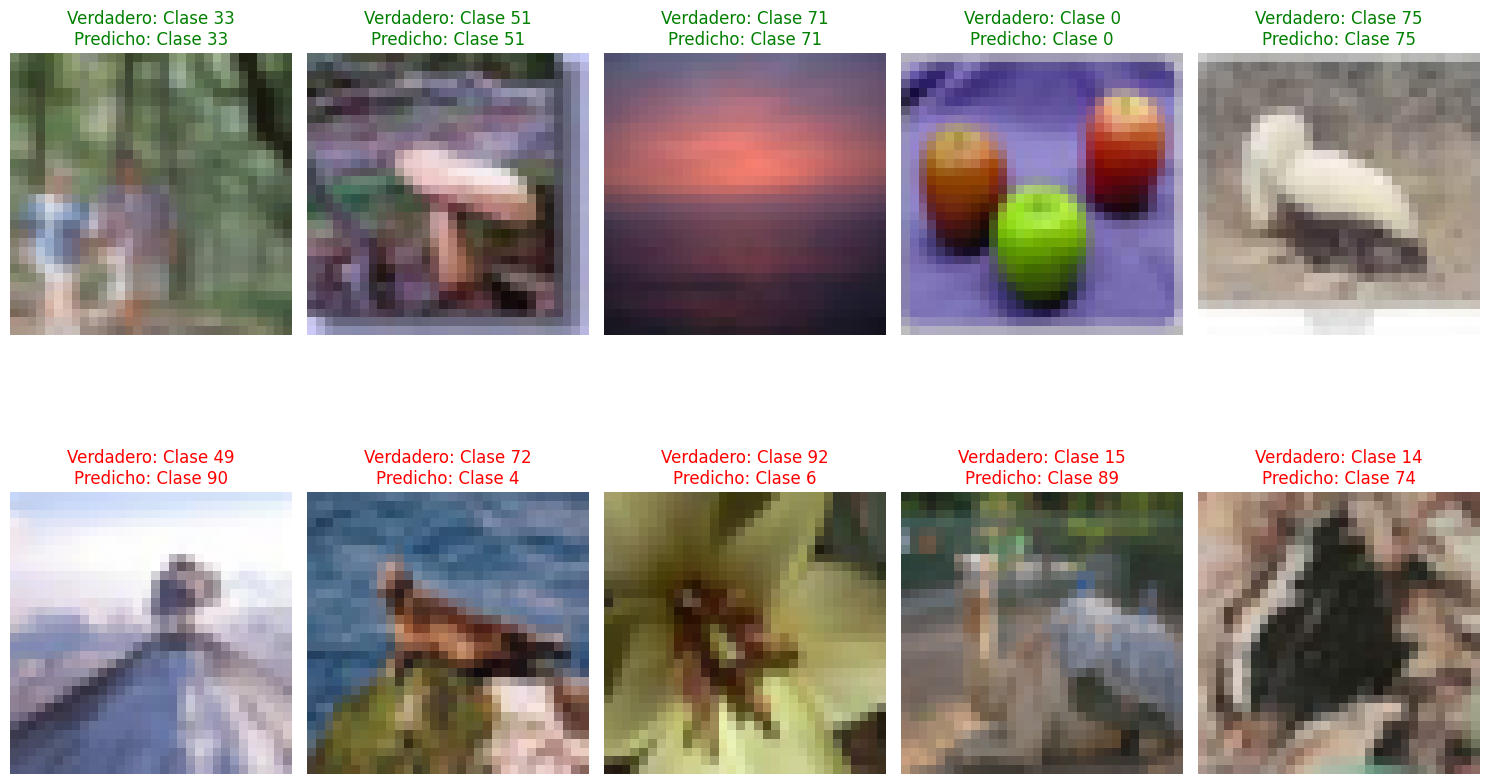

In [19]:
# 4. Visualizaci√≥n 1: Ejemplos de predicciones correctas e incorrectas
plt.figure(figsize=(15, 10))

# Nombres de clases CIFAR-100 (si no tienes estos, puedes usar √≠ndices)
# Esta es una lista simplificada, CIFAR-100 tiene 100 clases
class_names = [f"Clase {i}" for i in range(100)]  # Reemplaza con nombres reales si los tienes

# Obtener ejemplos de predicciones correctas
correct_idx = np.where(y_pred == y_true)[0]
# Obtener ejemplos de predicciones incorrectas
incorrect_idx = np.where(y_pred != y_true)[0]

# Mostrar 5 predicciones correctas
for i, idx in enumerate(correct_idx[:5]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    plt.title(f"Verdadero: {class_names[y_true[idx]]}\nPredicho: {class_names[y_pred[idx]]}", color='green')
    plt.axis('off')

# Mostrar 5 predicciones incorrectas
for i, idx in enumerate(incorrect_idx[:5]):
    plt.subplot(2, 5, i+6)
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    plt.title(f"Verdadero: {class_names[y_true[idx]]}\nPredicho: {class_names[y_pred[idx]]}", color='red')
    plt.axis('off')

plt.tight_layout()
plt.savefig('ejemplos_prediccion.png')
plt.show()

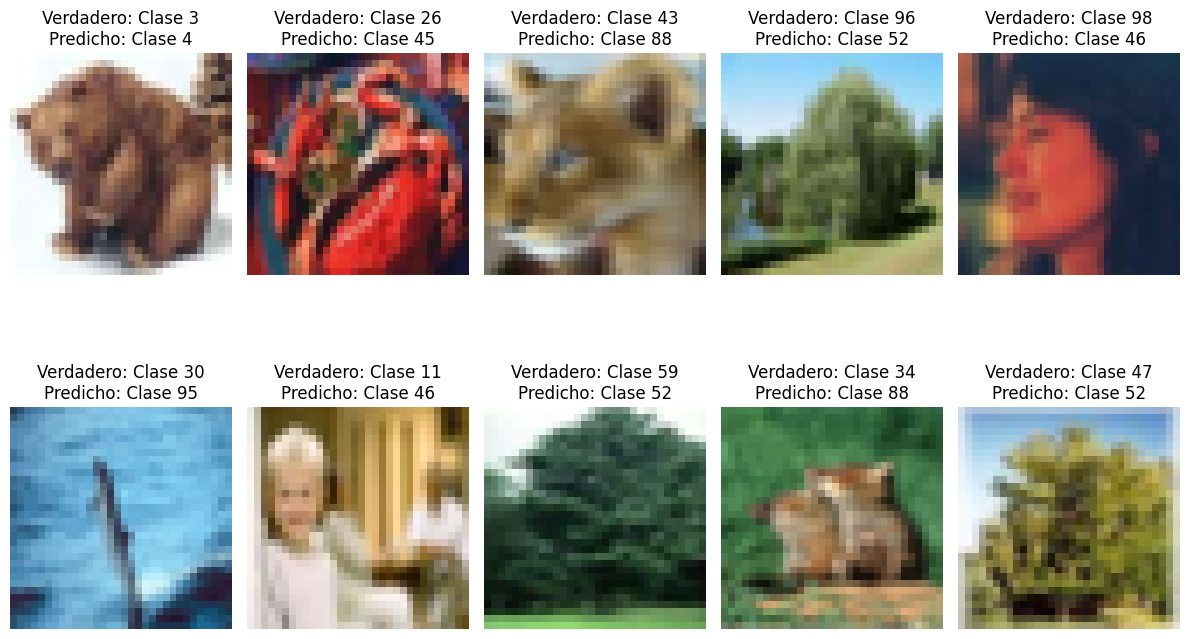

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
# 5. Visualizaci√≥n 2: Top-5 clases m√°s confundidas
conf_mat = confusion_matrix(y_true, y_pred)
np.fill_diagonal(conf_mat, 0)  # Eliminar diagonal para enfocarse en errores
most_confused = np.dstack(np.unravel_index(np.argsort(conf_mat.ravel())[-10:], conf_mat.shape))[0]

plt.figure(figsize=(12, 8))
for i, (true_class, pred_class) in enumerate(most_confused):
    plt.subplot(2, 5, i+1)
    idx = np.where((y_true == true_class) & (y_pred == pred_class))[0][0]
    plt.imshow(x_test[idx].reshape(32, 32, 3))
    plt.title(f"Verdadero: {class_names[true_class]}\nPredicho: {class_names[pred_class]}")
    plt.axis('off')

plt.tight_layout()
plt.savefig('clases_confundidas.png')
plt.show()

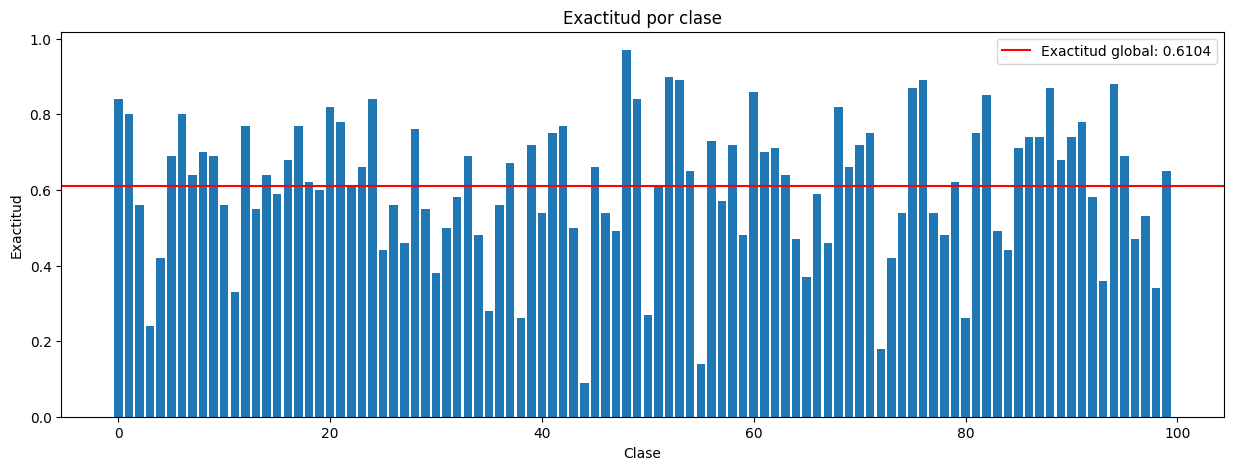

In [21]:
# 6. Visualizaci√≥n 3: Distribuci√≥n de precisi√≥n por clase
class_accuracy = np.zeros(100)
for i in range(100):
    class_indices = np.where(y_true == i)[0]
    if len(class_indices) > 0:
        class_accuracy[i] = np.mean(y_pred[class_indices] == i)

plt.figure(figsize=(15, 5))
plt.bar(range(100), class_accuracy)
plt.xlabel('Clase')
plt.ylabel('Exactitud')
plt.title('Exactitud por clase')
plt.axhline(y=accuracy, color='r', linestyle='-', label=f'Exactitud global: {accuracy:.4f}')
plt.legend()
plt.savefig('precision_por_clase.png')
plt.show()

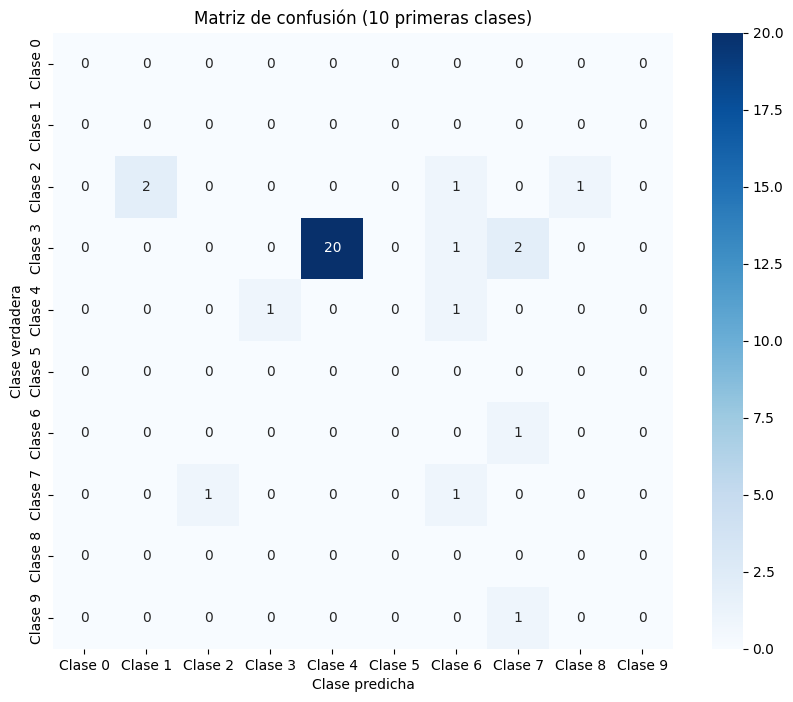

In [22]:
import seaborn as sns
# 7. Visualizaci√≥n 4: Matriz de confusi√≥n para las 10 primeras clases
plt.figure(figsize=(10, 8))
conf_mat_subset = conf_mat[:10, :10]  # Tomar solo las primeras 10 clases para legibilidad
sns.heatmap(conf_mat_subset, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names[:10], yticklabels=class_names[:10])
plt.xlabel('Clase predicha')
plt.ylabel('Clase verdadera')
plt.title('Matriz de confusi√≥n (10 primeras clases)')
plt.savefig('matriz_confusion.png')
plt.show()